## Feature selection within linear models (forward selection)

### Problem

You want to predict $y \in \mathbb{R}$ using linear regression. 

You got too many $x \in \mathbb{R}^{m}$ features to do so, and most of them are probably not statistically signifiant at all. 

You want to select the best features ($x$ coordinates) to perform the prediction. 

### Implemented solution

In this notebook, we implement a method to solve this problem called **forward selection**. 

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from copy import deepcopy
from sklearn.model_selection import train_test_split

## 1. Generate data

We generate a matrix $X$ of $n=400$ observations of normaly distributed data, with $m=80$ features for each datapoint. 

We then generate a random feature vector $b \in \mathbb{R^{m'}}$, with $m'=10$.

We finally set the dependent variable $y = a + < X', b>$, where $a \in \mathbb{R}$ and $X'$ is the 10 first columns of $X$. This means that the $y$ is perfectly linearly dependent of the 10 first columns of $X$ *only*. The other columns of $X$ are just noise or irrelevant data. 

In [85]:
n = 400
m = 80 

X = np.random.normal(size=(n, m))

a = 10
b = 100*np.random.normal(size=10)
y = a + X[:,:10].dot(b)

For example, this is a good

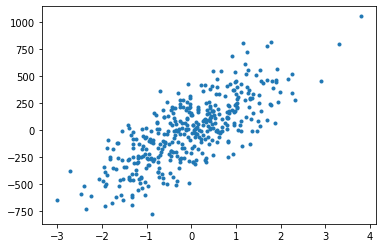

In [92]:
plt.plot(X[:, np.argmax(b)], y, '.')
#plt.plot(X[:,50], y, '.')

Let's try to compute a quick OLS on all the features. 

In [88]:
def add_1(X):
    n = X.shape[0]
    i = np.ones((n,1))
    return np.concatenate((i, X), axis=1)

def run_OLS(X, y, const=True):
    """Performs an OLS regression using the module statsmodel."""
    if const:
        model = OLS(y, add_1(X), hasconst=True).fit()
    else:
        model = OLS(y, X).fit()
    return model



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

run_OLS(X, y).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.391e+29
Date:                Sat, 11 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:03:17   Log-Likelihood:                 10649.
No. Observations:                 400   AIC:                        -2.114e+04
Df Residuals:                     319   BIC:                        -2.081e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000   4.16e-14    2.4e+14      0.000      10.000      10.000
x1            11.6527   4.04e-14   2.88e+14      0.000      11.653      11.653
x2            74.0666   3.95e-14   1.88e+15      0.000      74.067      74.067
x3           121.7117   4.41e-14   2.76e+15      0.000     121.712     121.712
x4          -122.4574   4.16e-14  -2.94e+15      0.000    -122.457    -122.457
x5           -65.0551   4.08e-14   -1.6e+15      0.000     -65.055     -65.055
x6             7.0052   4.01e-14   1.75e+14      0.000       7.005       7.005
x7           -21.6608   4.21e-14  -5.15e+14      0.000     -21.661     -21.661
x8           223.8449   3.98e-14   5.62e+15      0.000     223.845     223.845
x9           -67.0367   4.02e-14  -1.67e+15      0.000     -67.037     -67.037
x10           16.2069   4.18e-14   3.88e+14      0.000      16.207      16.207
x11        -1.776e-14   4.04e-14     -0.439      0.661   -9.73e-14    6.18e-14
x12        -1.492e-13   4.15e-14     -3.597      0.000   -2.31e-13   -6.76e-14
x13         5.462e-14   4.25e-14      1.286      0.199   -2.89e-14    1.38e-13
x14        -3.508e-14   4.14e-14     -0.848      0.397   -1.17e-13    4.64e-14
x15        -1.998e-14   4.18e-14     -0.478      0.633   -1.02e-13    6.23e-14
x16         7.927e-14   4.07e-14      1.950      0.052   -7.19e-16    1.59e-13
x17        -2.931e-14   4.01e-14     -0.730      0.466   -1.08e-13    4.97e-14
x18         6.573e-14   4.38e-14      1.500      0.135   -2.05e-14    1.52e-13
x19         1.297e-13   4.08e-14      3.175      0.002    4.93e-14     2.1e-13
x20        -1.421e-14   4.33e-14     -0.328      0.743   -9.93e-14    7.09e-14
x21        -9.948e-14   4.13e-14     -2.409      0.017   -1.81e-13   -1.82e-14
x22         1.599e-14   4.12e-14      0.388      0.698   -6.51e-14    9.71e-14
x23         3.553e-15   4.12e-14      0.086      0.931   -7.76e-14    8.47e-14
x24         2.132e-14   4.44e-14      0.480      0.632   -6.61e-14    1.09e-13
x25          3.02e-14    4.2e-14      0.719      0.473   -5.25e-14    1.13e-13
x26        -7.727e-14   4.04e-14     -1.911      0.057   -1.57e-13    2.29e-15
x27         2.931e-14   3.81e-14      0.769      0.443   -4.57e-14    1.04e-13
x28        -4.219e-15   4.34e-14     -0.097      0.923   -8.97e-14    8.12e-14
x29        -5.063e-14   3.97e-14     -1.275      0.203   -1.29e-13    2.75e-14
x30        -4.086e-14   4.09e-14     -1.000      0.318   -1.21e-13    3.96e-14
x31        -3.553e-15   4.36e-14     -0.081      0.935   -8.94e-14    8.23e-14
x32         1.421e-13   4.42e-14      3.212      0.001    5.51e-14    2.29e-13
x33         3.575e-14   4.13e-14      0.865      0.388   -4.55e-14    1.17e-13
x34         9.104e-14   4.17e-14      2.186      0.030    9.09e-15    1.73e-13
x35        -2.576e-14   4.14e-14     -0.622      0.534   -1.07e-13    5.57e-14
x3

## 2. Forward selection algorithm

In [89]:
def forward_selection(X, y, eps=0.1, wordy=True):
    """Forward selection method for linear regression.
    Returns a list of indexes for features of X."""
    n = X.shape[0]
    p = X.shape[1]
    stop = False
    selected_var = []
    residual_y = deepcopy(y)
    indexes_left = list(range(p))
    p_values_stored = []
    iterator = 0
    while stop is False:
        T_stats = []
        p_values = []
        # Compute test statistics for each variable left
        for k in indexes_left:
            X_k = X[:,k].reshape(-1,1)
            model = run_OLS(X_k, residual_y, const=False)
            T = np.abs(model.tvalues[0])
            p_value = model.pvalues[0]
            T_stats.append(T)
            p_values.append(p_value)
        # Stopping criterion 
        if indexes_left==[] or min(p_values) > eps: 
            stop = True
        else:     
            # Find best var index 
            best_k_i = np.argmax(T_stats)
            best_k = indexes_left[best_k_i]
            # Add it to a list
            selected_var.append(best_k)
            indexes_left.remove(best_k)
            # Compute the linear regression model and...
            X_k = X[:,best_k].reshape(-1, 1)
            model = run_OLS(X_k, residual_y, const=False)
            # ... Recompute the residual
            residual_y -= model.predict(X_k)
            # Store the first 3 p_values found (for visualization)
            if iterator < 3:
                p_values_stored.append(p_values)
        iterator += 1
            
    return selected_var
    
forward_selection(X, y, 0.05)


[7, 3, 2, 1, 8, 4, 6, 9, 0, 5, 52, 22, 25, 66]